In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [23]:
# Pip install method (recommended)
!python -m pip install --upgrade pip
!pip install ultralytics wandb

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.2/78.2 GB disk)


In [24]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [25]:
!git clone https://github.com/roguehunter7/CornerSentinal
%cd CornerSentinal

Cloning into 'CornerSentinal'...
remote: Enumerating objects: 2639, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2639 (delta 0), reused 5 (delta 0), pack-reused 2634
Receiving objects: 100% (2639/2639), 639.78 MiB | 43.61 MiB/s, done.
Updating files: 100% (2631/2631), done.
/content/CornerSentinal


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5qV8OiNQdkz6Fvk3416p")
project = rf.workspace("main-project-dih2s").project("indian-vehicles-g9xm2")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.206, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to indian-vehicles-1 in yolov8:: 100%|██████████| 17174/17174 [00:03<00:00, 4556.53it/s]


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5qV8OiNQdkz6Fvk3416p")
project = rf.workspace("main-project-dih2s").project("indian-vehicles-g9xm2")
dataset = project.version(2).download("yolov8")

## Custom Training

In [9]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/indian-vehicles-1/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/indian-vehicles-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [10]:
!ls {HOME}/runs/detect/train4/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1699174572.168942cb35dc.1721.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


FileNotFoundError: ignored

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


FileNotFoundError: ignored

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: ignored

## Validate Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/indian-vehicles-1/valid/labels.cache... 1231 images, 0 backgrounds, 0 corrupt: 100% 1231/1231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 77/77 [00:19<00:00,  4.01it/s]
                   all       1231       1945      0.924      0.878      0.952      0.765
                   HMV       1231        591      0.881        0.9      0.956      0.789
                   LMV       1231        964      0.949      0.881      0.958      0.787
                    MC       1231        390      0.943      0.854      0.943      0.719
Speed: 0.9ms preprocess, 5.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/632 /content/datasets/indian-vehicles-1/test/images/015-new-iveco-daily-van-on-the-road-in-south-of-finland-the-new-iveco-daily-_jpg.rf.9f5dfb1b77b99e308bd8d075149558ff.jpg: 800x800 1 LMV, 15.0ms
image 2/632 /content/datasets/indian-vehicles-1/test/images/0320Indian20truck_jpg.rf.62a63a5ce62ad6b05f559582319b0134.jpg: 800x800 1 HMV, 1 LMV, 10.0ms
image 3/632 /content/datasets/indian-vehicles-1/test/images/1-BMTC_jpg.rf.0837de7593d5c00ecc3b77294038f92e.jpg: 800x800 2 HMVs, 1 MC, 10.8ms
image 4/632 /content/datasets/indian-vehicles-1/test/images/1-BMTC_jpg.rf.1cac48063f1d5c88618207d77603856b.jpg: 800x800 2 HMVs, 10.0ms
image 5/632 /content/datasets/indian-vehicles-1/test/images/1-BMTC_jpg.rf.5fa488cf0deac6f232e77cc2f37212e8.jpg: 800x800 2 HMVs, 1 MC, 9.9ms
image 6/632 /content/datasets/indian-vehicles-1/tes

**NOTE:** Let's take a look at few results.

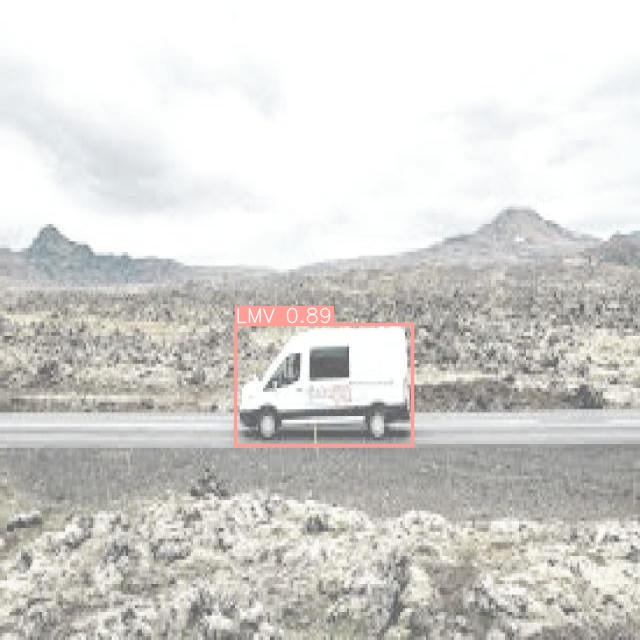

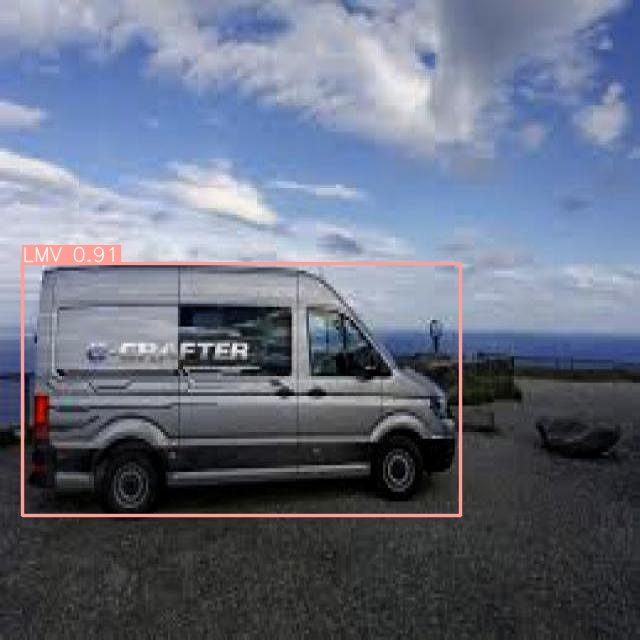

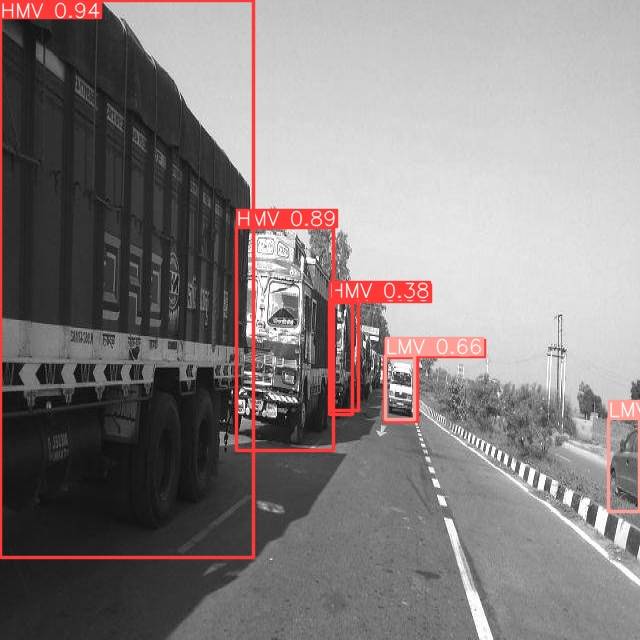

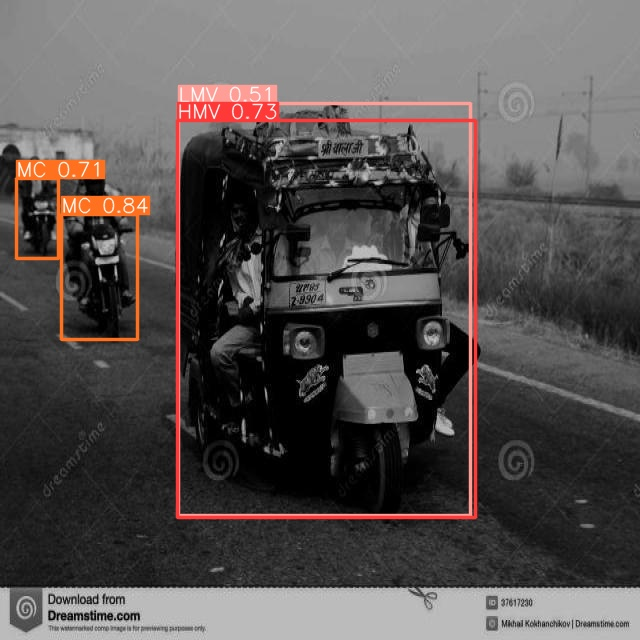

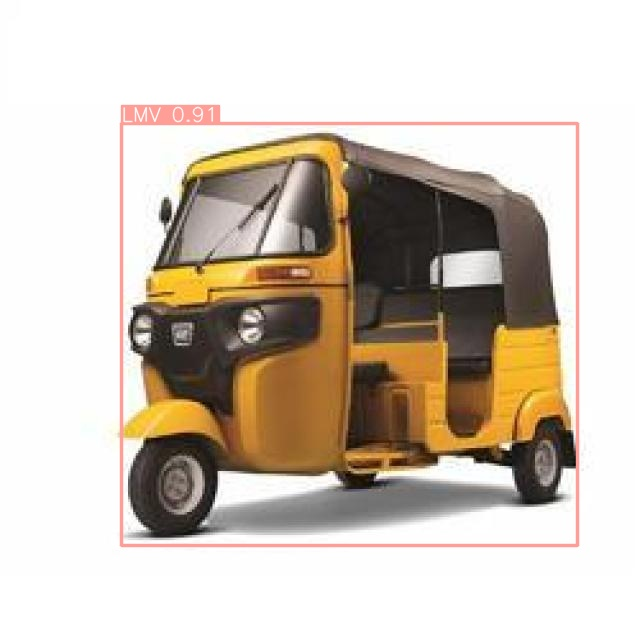

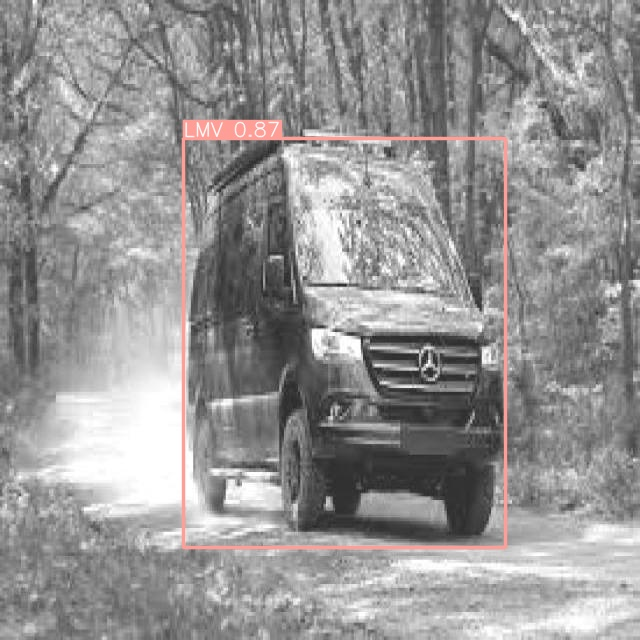

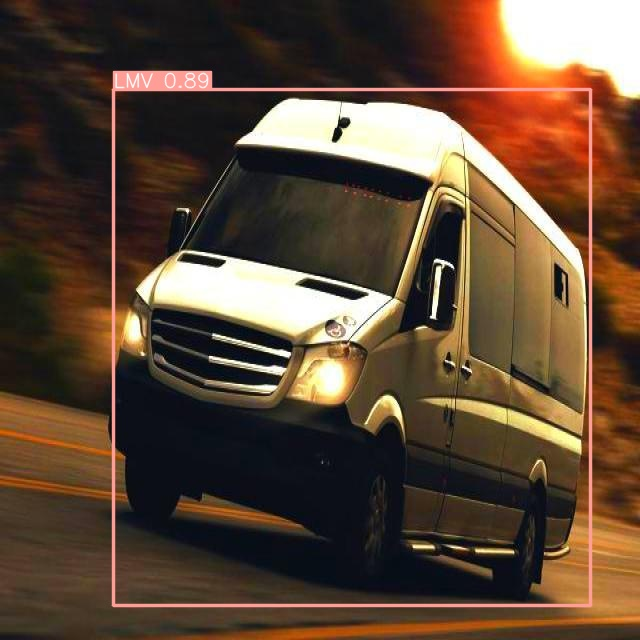

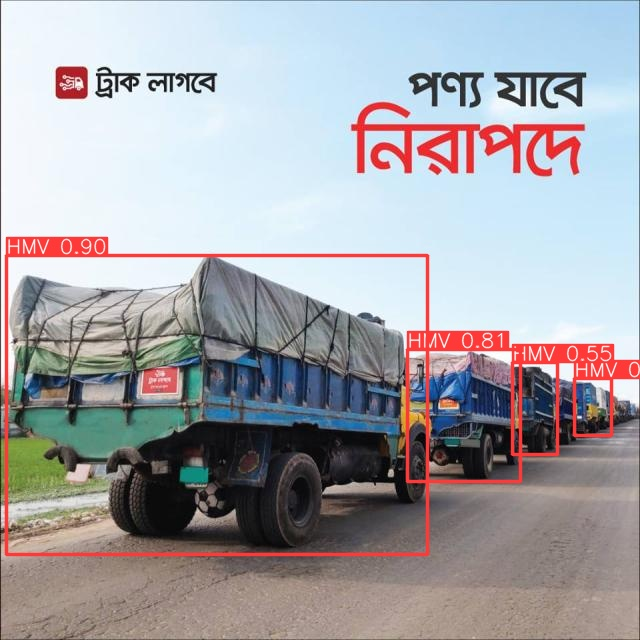

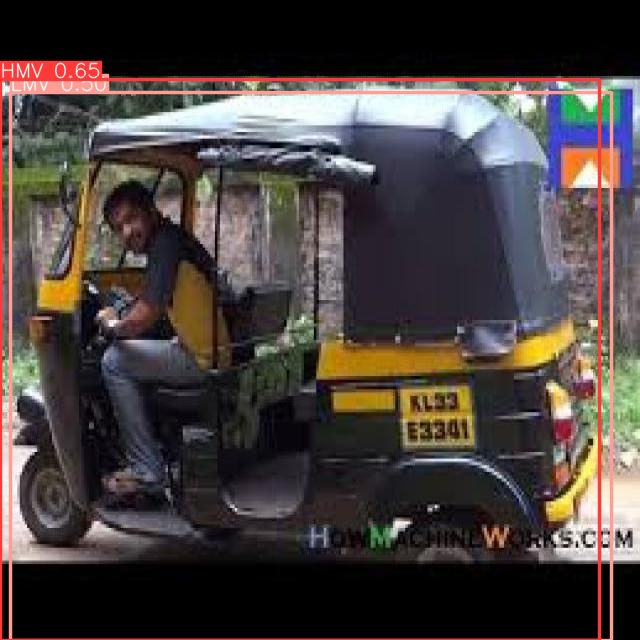

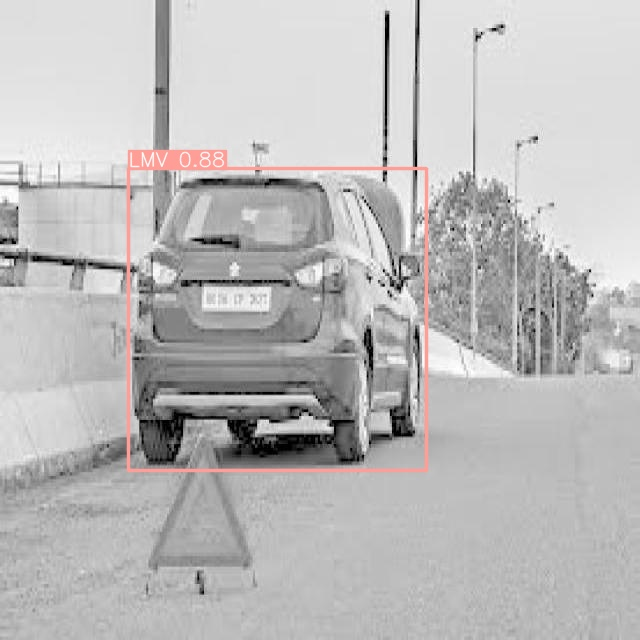

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt source=/content/CornerSentinal/test_images/ooty.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (5535/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5536/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5537/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5538/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5539/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5540/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5541/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 4 LMVs, 7.2ms
video 1/1 (5542/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 1 HMV, 4 LMVs, 7.2ms
video 1/1 (5543/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 1 HMV, 5 LMVs, 7.7ms
video 1/1 (5544/10531) /content/CornerSentinal/test_images/ooty.mp4: 480x800 1 HMV, 4 LMVs, 7.7ms
video 1/1 (5545/10

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._